경사하강법
로지스틱 회귀(다중 분류)
소프트맥스 함수 : 각 열의 proba 값을 더했을 때 1(100%)이 나와야 하는데, 
1이 나오지 않을 때 소프트맥스 함수 사용.

규제를 주고 반복 횟수를 높였는데도 정답률(70~80% 정도 나올 때)이 안좋을 때 사용.

In [66]:
# from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [67]:
import pandas as pd
df=pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [68]:
df.shape

(159, 6)

In [69]:
# data, target 분리
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species'].to_numpy()

# pandas로 변경
#pd.DataFrame(fish_input)

In [70]:
# train, test 세트 분리
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)
# train_input

In [71]:
# 확인

In [72]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [74]:
# print(lr.score(train_scaled, train_target))
# print(lr.score(test_scaled,test_target))
      

경사하강법

In [75]:
# 경사하강법 적용 : 머신러닝을 훈련하는 방법, 최적화하는 방법
from sklearn.linear_model import SGDClassifier

# 손실함수(loss=) : 분류모델은 경사하강법을 사용할 수 없음(==> 0과 1밖에 없으므로 값이 중간에 끊기게 돼). 
                #  연속적인 데이터만 가능. 미분 가능한 데이터. 즉 분류모델에서는 회귀(예측)함수 가져와서 적용
# max_iter 높을 수록 효율 좋음.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 100보다 10의 효율이 더 좋음.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 0.773109243697479
print(sc.score(test_scaled,test_target)) # 0.775

0.773109243697479
0.775


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [76]:
# 다시 재 훈련이 가능함. ==> 훈련의 훈련을 해서 효율이 좋아져.
# partial_fit : 이전 기울기, y절편을 가지고 다시 학습
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 0.8151260504201681
print(sc.score(test_scaled,test_target)) # 0.85                   ==> 과소적합을 확인함

0.8151260504201681
0.85


에포크, 과대/과소적합 문제

In [77]:
# 그래프를 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)

In [78]:
classes # 7개의 데이터 확인

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [79]:
# 반복문
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    sc1 = sc.score(train_scaled, train_target)
    train_score.append(sc1)
    sc2 = sc.score(test_scaled, test_target)
    test_score.append(sc2)

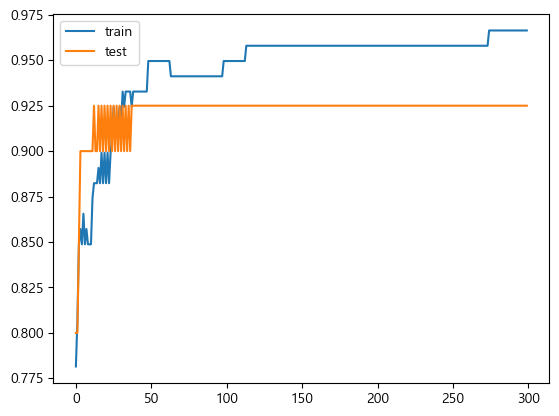

In [80]:
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend(loc=0)
plt.show()

# 두 선 사이의 간격이 적어야 과대적합이 안나와
# x축 0~50 부근 : 과소적합(test가 더 큼)

In [81]:
sc = SGDClassifier(loss='log_loss', max_iter=90, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 0.8403361344537815
print(sc.score(test_scaled,test_target)) # 0.8


0.8403361344537815
0.8


In [82]:
# tol = None : 무조건 max_iter = 100만큼 반복시켜 줘 
# Q) 있는 거랑 없는 거랑 차이가 뭐지? SGDClassifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 이상 훈련하지 않고 자동으로 멈추는데, 
# tol=None 으로 지정해 무조건 max_iter=100 만큼 반복하도록 한다. tol로 반복 멈출 수 있음. none하면 max_iter에서 지정한 만큼 무조건 반복
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target)) # 0.957983193277311
print(sc.score(test_scaled,test_target)) # 0.925


0.957983193277311
0.925


In [83]:
# 경사하강법 : 반복해서 머신러닝을 훈련을 시켜 정답률을 높여주는 방법 